In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df1 = pd.read_csv(r'C:\Users\Admin\Desktop\BTL_TDA\Data\diem_thi_2024.csv')

Thông tin thủ khoa của các khối thi và thủ khoa toàn nước

In [18]:

khoi_map = {
    'A': ['Toán', 'Lý', 'Hoá'],
    'B': ['Toán', 'Hoá', 'Sinh'],
    'C': ['Văn', 'Sử', 'Địa'],
    'D': ['Toán', 'Văn', 'Ngoại Ngữ']
}

No1_list = []
for khoi, mon_list in khoi_map.items():
    if all(mon in df1.columns for mon in mon_list): 
        if khoi == 'D' and 'ma_ngoai_ngu' in df1.columns:  
            df1_d = df1[df1['ma_ngoai_ngu'] == 'N1']  
            if not df1_d.empty:  
                df1_d[f'TongDiem_{khoi}'] = df1_d[mon_list].sum(axis=1)  
                max_score = df1_d[f'TongDiem_{khoi}'].idxmax()  

                No1_list.append({
                    'Khoi': khoi,
                    'sbd': df1_d.loc[max_score, 'sbd'],
                    'TongDiem': df1_d.loc[max_score, f'TongDiem_{khoi}']
                })
        else:
            df1[f'TongDiem_{khoi}'] = df1[mon_list].sum(axis=1) 
            max_score = df1[f'TongDiem_{khoi}'].idxmax()

            No1_list.append({
                'Khoi': khoi,
                'sbd': df1.loc[max_score, 'sbd'],
                'TongDiem': df1.loc[max_score, f'TongDiem_{khoi}']
            })

thu_khoa_df = pd.DataFrame(No1_list)


print("Danh sách thủ khoa các khối:")
print(thu_khoa_df)


Danh sách thủ khoa các khối:
  Khoi       sbd  TongDiem
0    A  26020938     29.60
1    B   3015805     29.55
2    C  19000335     29.75
3    D  16000274     28.75


C:\Users\Admin\AppData\Local\Temp\ipykernel_11916\3246970493.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Thủ khoa tất cả các môn tốt nghiệp

In [19]:
champion = []

df1['tunhien'] = df1[['Toán', 'Lý', 'Hoá', 'Văn', 'Ngoại Ngữ', 'Sinh']].sum(axis=1)

df1['xahoi'] = df1[['Toán', 'Văn', 'Ngoại Ngữ', 'Sử', 'Địa', 'GDCD']].sum(axis= 1)

max_tunhien_idx = df1['tunhien'].idxmax()
thu_khoa_tunhien = df1.loc[max_tunhien_idx, ['sbd', 'tunhien', 'province_name']]


max_xahoi_idx = df1['xahoi'].idxmax()
thu_khoa_xahoi = df1.loc[max_xahoi_idx, ['sbd', 'xahoi', 'province_name']]


champion = [
    {'Nhom': 'Tu Nhien', 'sbd': thu_khoa_tunhien['sbd'], 'TongDiem': thu_khoa_tunhien['tunhien'], 'Tỉnh' : thu_khoa_tunhien['province_name']},
    {'Nhom': 'Xa Hoi', 'sbd': thu_khoa_xahoi['sbd'], 'TongDiem': thu_khoa_xahoi['xahoi'], 'Tỉnh' : thu_khoa_xahoi['province_name']}
]

champion_df = pd.DataFrame(champion)


print("Danh sách thủ khoa:")
print(champion_df)

Danh sách thủ khoa:
       Nhom       sbd  TongDiem     Tỉnh
0  Tu Nhien  29003371     56.95  Nghệ An
1    Xa Hoi   1034208     57.85   Hà Nội


Số điểm 10 ở mỗi môn học

In [20]:
subject_columns = ['Toán', 'Văn', 'Ngoại Ngữ', 'Sinh', 'Lý', 'Hoá', 'Sử', 'Địa', 'GDCD']

Score10 = {subject : (df1[subject] == 10).sum() for subject in subject_columns}

for subject, count in Score10.items():
    print(f'Số điểm 10 ở {subject} là {count}')

Số điểm 10 ở Toán là 0
Số điểm 10 ở Văn là 2
Số điểm 10 ở Ngoại Ngữ là 645
Số điểm 10 ở Sinh là 34
Số điểm 10 ở Lý là 55
Số điểm 10 ở Hoá là 1278
Số điểm 10 ở Sử là 2108
Số điểm 10 ở Địa là 3175
Số điểm 10 ở GDCD là 3661


Phân tích phổ điểm tất cả các môn học

In [21]:



# Danh sách các môn cần vẽ
subjects = ['Toán', 'Văn', 'Ngoại Ngữ', 'Lý', 'Hoá', 'Sinh', 'Sử', 'Địa', 'GDCD']

# Duyệt qua từng môn và vẽ biểu đồ
for subject in subjects:
    if subject in ['Toán', 'Ngoại Ngữ']:
        step = 0.2  # Độ chia 0.2
    else:
        step = 0.25  # Độ chia 0.25

    all_score = [round(i * step, 2) for i in range(int(10 / step) + 1)]  # Các mức điểm
    distribution_score = {score: (df1[subject] == score).sum() for score in all_score}
    df_diem = pd.DataFrame(list(distribution_score.items()), columns=['Điểm', 'Số lượng'])

    fig = px.bar(
        df_diem,
        x='Điểm',
        y='Số lượng',
        title=f'Phân bố điểm môn {subject}',
        labels={'Điểm': 'Điểm', 'Số lượng': 'Số lượng thí sinh'},
        text='Số lượng'  # Hiển thị số lượng trực tiếp trên cột
    )

    # Tuỳ chỉnh giao diện
    fig.update_traces(
        textposition='outside',  # Vị trí số lượng nằm ngoài cột
        marker=dict(color='skyblue', line=dict(color='black', width=1))  # Màu và viền cột
    )

    fig.update_layout(
        xaxis=dict(tickangle=45),  # Xoay nhãn trục X
        yaxis=dict(title='Số lượng thí sinh'),
        xaxis_title='Điểm',
        title_font_size=14,
        font=dict(size=12),
        width=1000,  # Đặt chiều rộng của biểu đồ
        height=600  
    )

    # Hiển thị biểu đồ
    fig.show()

Biểu đồ tròn phân loại điểm của các thí sinh thuộc loại nào 

C:\Users\Admin\AppData\Local\Temp\ipykernel_11916\2892587015.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



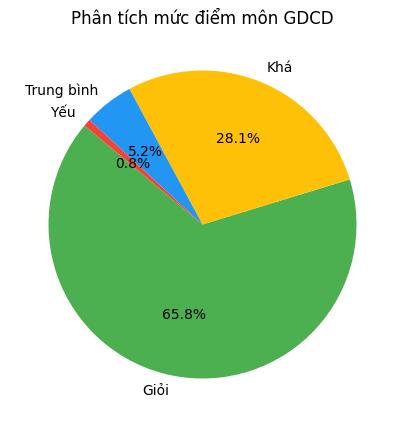

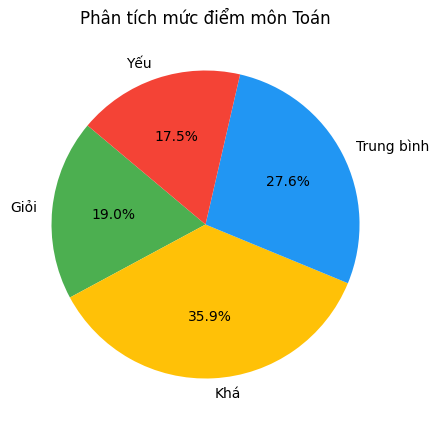

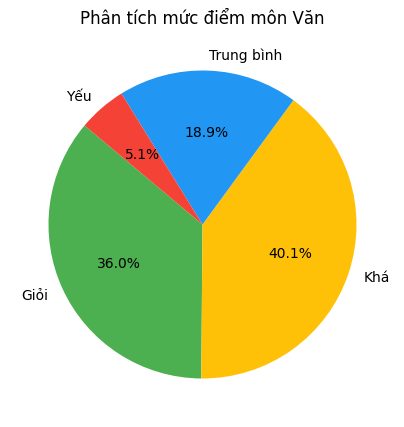

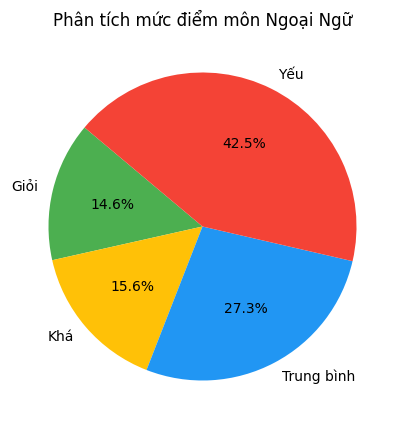

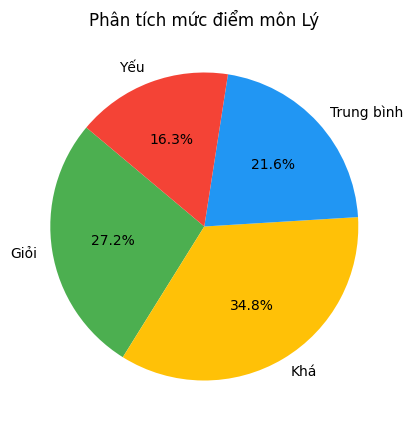

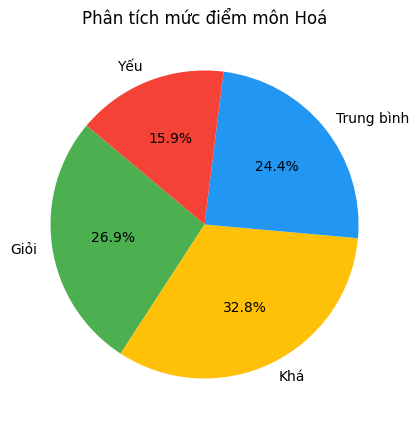

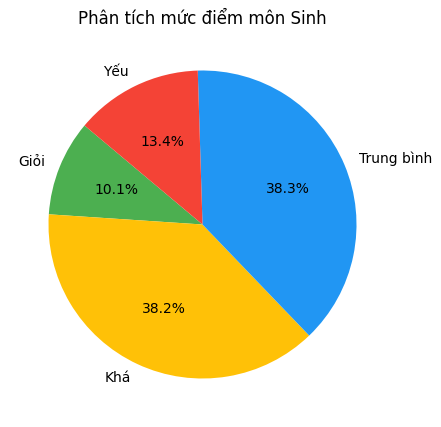

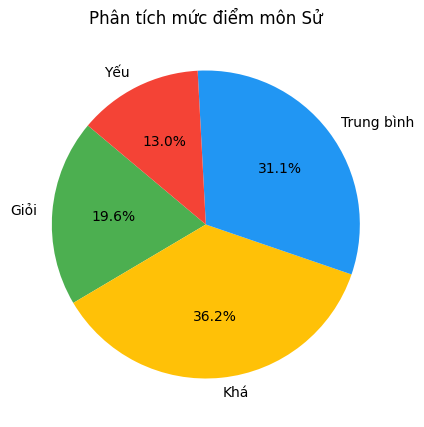

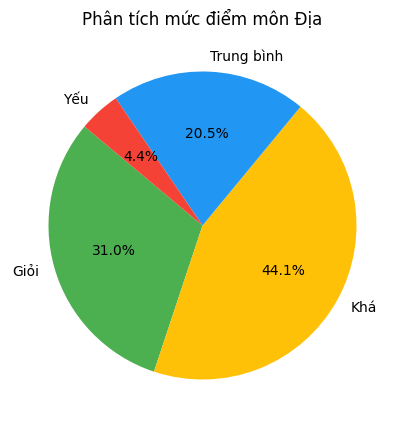

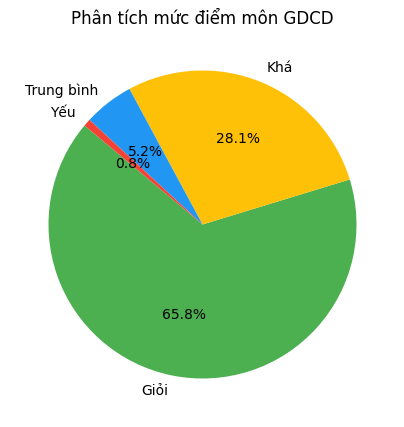

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

def classify(score):
    if score >= 8:
        return "Giỏi"
    elif score >= 6.5 and score < 8:
        return "Khá"
    elif score >= 5 and score < 6.5:
        return "Trung bình"
    else:
        return "Yếu"

# Danh sách môn học
subjects = ['Toán', 'Văn', 'Ngoại Ngữ', 'Lý', 'Hoá', 'Sinh', 'Sử', 'Địa', 'GDCD']

# Màu cố định theo thứ tự cho các loại phân loại
fixed_colors = {
    "Giỏi": "#4CAF50",       # Màu xanh lá
    "Khá": "#FFC107",        # Màu vàng
    "Trung bình": "#2196F3", # Màu xanh dương
    "Yếu": "#F44336"         # Màu đỏ
}

for subject in subjects:
    # Kiểm tra nếu môn học tồn tại trong DataFrame
    if subject in df1.columns:
        # Loại bỏ các giá trị NaN để chỉ xét các thí sinh có điểm
        valid_scores = df1[subject].dropna()

        # Kiểm tra nếu có dữ liệu hợp lệ sau khi loại bỏ NaN
        if not valid_scores.empty:
            # Phân loại các thí sinh có điểm
            classified = valid_scores.apply(classify)

            # Đếm số lượng thí sinh trong mỗi loại
            counts = classified.value_counts()

            # Sắp xếp lại thứ tự cho khớp với màu sắc
            labels = list(fixed_colors.keys())
            sizes = [counts.get(label, 0) for label in labels]
            colors = [fixed_colors[label] for label in labels]

            # Vẽ biểu đồ tròn
            plt.figure(figsize=(5, 5))
            plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
            plt.title(f"Phân tích mức điểm môn {subject}")  # Cập nhật môn học trong tiêu đề
            plt.show()
        else:
            print(f"Môn {subject} không có dữ liệu hợp lệ.")
